# Part I - (Total number of enterprises employees in Saudi Arabia (2022))
## by (Osama Alsubaie)

## Introduction

## Preliminary Wrangling

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.io as pio
pio.renderers.default = 'notebook'

# suppress warnings from final output
import warnings

warnings.simplefilter("ignore")

Load in the dataset into a pandas dataframe (the original data files language is Arabic, so I created a python file to convert the language to English and concat the data into one file)

In [4]:
from Translate_Data_Language import main

# get the year and quarters from the user
year = input("Enter the year (e.g., 2022): ")
quarters = range(1, int(input("Enter the number of the quarters exist in the data(e.g., q1, q2, q3, q4): ")) + 1)

# create a dataframe containing all the data for all quarters
# please enter 2022 for the year and 4 for the number of quarters
df = main(year, quarters)

# explore the dataset
df.head(10)

,year,quarter,region,sector,enterprise_size,number_of_enterprises,number_of_saudi_employees,number_of_saudi_employees (male),number_of_saudi_employees (female),number_of_foreign_employees,number_of_foreign_employees (male),number_of_foreign_employees (female)
0,2022,1,Eastern Province,"Travel Agencies, Tour Operators, Reservation S...",small,50,276,132,144,462,451,11
1,2022,1,Eastern Province,"Travel Agencies, Tour Operators, Reservation S...",large,1,273,258,15,334,333,1
2,2022,1,Eastern Province,"Travel Agencies, Tour Operators, Reservation S...",micro,128,96,47,49,198,194,4
3,2022,1,Eastern Province,"Travel Agencies, Tour Operators, Reservation S...",medium,7,184,119,65,392,390,2
4,2022,1,Al Bahah Region,"Travel Agencies, Tour Operators, Reservation S...",micro,2,0,0,0,6,6,0
5,2022,1,Al Jawf Region,"Travel Agencies, Tour Operators, Reservation S...",small,3,13,12,1,35,34,1
6,2022,1,Al Jawf Region,"Travel Agencies, Tour Operators, Reservation S...",micro,7,3,0,3,14,14,0
7,2022,1,Northern Borders Region,"Travel Agencies, Tour Operators, Reservation S...",small,1,2,2,0,8,8,0
8,2022,1,Northern Borders Region,"Travel Agencies, Tour Operators, Reservation S...",large,1,116,113,3,537,537,0
9,2022,1,Northern Borders Region,"Travel Agencies, Tour Operators, Reservation S...",micro,8,2,1,1,11,11,0


### What is the structure of your dataset?

> The dataset includes the total number of employees in Saudi Arabia (Saudi (male) - Saudi (female) - non Saudi (male) - non Saudi (Female)) according to the size of the enterprises (micros, small, medium, and large) and economic activity(using the National Classification of Economic Activities (ISIC4) - the second level) in each geographical region for 2022.

### What is/are the main feature(s) of interest in your dataset?

> Total Number of Employees: This is the primary variable of interest, as it represents the count of employees in various enterprises across different regions and economic activities. It provides insights into the overall workforce distribution and size.

> Geographical Region: The geographical region is an important factor that can impact the distribution of employees. Analyzing how the number of employees varies across different regions can reveal patterns of economic activity and workforce distribution.

> Economic Activity (ISIC4): Economic activity categories provide information about the types of industries and sectors where employees are working. Analyzing how the distribution of employees varies across different economic activities can provide insights into the economic landscape.

> Enterprise Size: The size of enterprises (micro, small, medium, large) is a key factor that can influence the number of employees. Understanding how employees are distributed across enterprise sizes can offer insights into the role of different types of businesses in the workforce.

> Gender and Nationality: The dataset appears to include gender (male, female) and nationality (Saudi, non-Saudi) breakdowns. Analyzing the workforce distribution based on gender and nationality can provide insights into workforce diversity and composition.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> All the features Above collectively allow for comprehensive analysis, answering questions such as:
- How is the workforce distributed across different regions in Saudi Arabia?
- Which economic activities have the highest number of employees?
- Are there variations in workforce distribution based on enterprise size?
- What is the gender and nationality breakdown of the workforce in different economic activities and regions?
- How has the workforce distribution changed over the year 2022?

## Univariate Exploration

### How many enterprises employees are there in Saudi Arabia in for the year 2022?

In [5]:
# Since the data is divided into quarters, we will take the 4th quarter data because it has the most recent data for the year 2022
df_2022_q4 = df[df['quarter'] == 4]

# get the total number of employees in Saudi Arabia
total_employees = df_2022_q4['number_of_saudi_employees'].sum() + df_2022_q4['number_of_foreign_employees'].sum()

# print the total number of employees in Saudi Arabia
from IPython.display import Markdown as md

md(f'>### The total number of enterprises employees in Saudi Arabia for the year 2022 is {total_employees:,} employees')

>### The total number of enterprises employees in Saudi Arabia for the year 2022 is 9,634,948 employees

### Q1: What is the percentage of the men/female employees in Saudi Arabia enterprises for the year 2022?

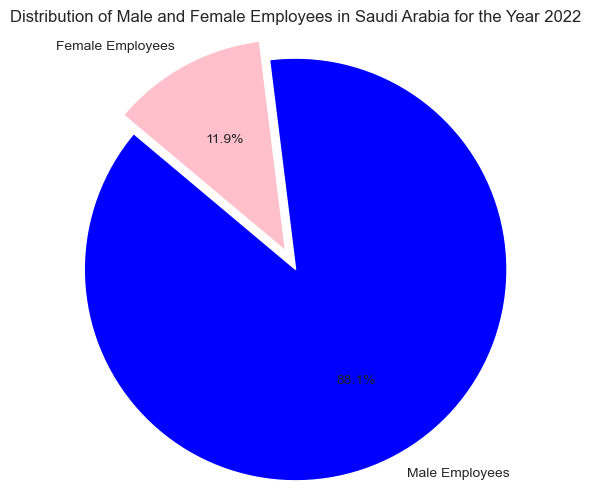

In [6]:
# get the total number of male employees in Saudi Arabia
saudi_male = df_2022_q4['number_of_saudi_employees (male)'].sum()
non_saudi_male = df_2022_q4['number_of_foreign_employees (male)'].sum()
total_male_employees = saudi_male + non_saudi_male

# get the total number of female employees in Saudi Arabia
saudi_female = df_2022_q4['number_of_saudi_employees (female)'].sum()
non_saudi_female = df_2022_q4['number_of_foreign_employees (female)'].sum()
total_female_employees = saudi_female + non_saudi_female

# pie chart displays the male & female employees in Saudi Arabia
plt.figure(figsize=(6, 6))
plt.pie([total_male_employees, total_female_employees], labels=['Male Employees', 'Female Employees'],
        colors=['blue', 'pink'], explode=(0.1, 0), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Male and Female Employees in Saudi Arabia for the Year 2022')
plt.axis('equal')

# Display the pie chart
plt.show()

### Q2: What is the total count of each enterprise size in Saudi Arabia?

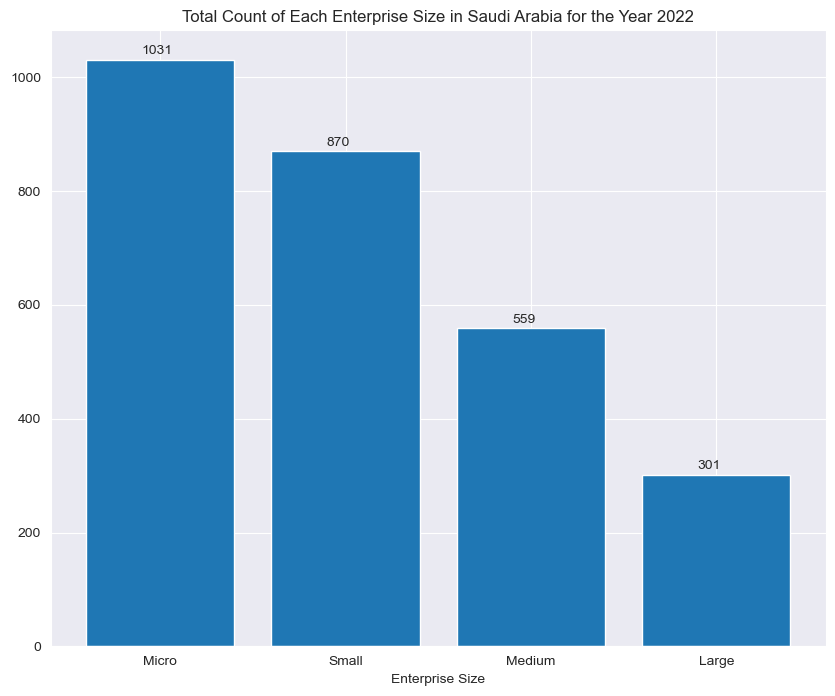

In [7]:
# get the sum of enterprises for each enterprise size
df_2022_q4.groupby('enterprise_size').sum()

# get the total count of each enterprise size in Saudi Arabia
micro = df_2022_q4[df_2022_q4['enterprise_size'] == 'micro'].shape[0]
small = df_2022_q4[df_2022_q4['enterprise_size'] == 'small'].shape[0]
medium = df_2022_q4[df_2022_q4['enterprise_size'] == 'medium'].shape[0]
large = df_2022_q4[df_2022_q4['enterprise_size'] == 'large'].shape[0]

# bar chart displays the total count of each enterprise size in Saudi Arabia
plt.figure(figsize=(10, 8))
plt.bar(['Micro', 'Small', 'Medium', 'Large'], [micro, small, medium, large], color='tab:blue')
plt.title('Total Count of Each Enterprise Size in Saudi Arabia for the Year 2022')
plt.xlabel('Enterprise Size')

# Add the total count to each bar
for i, v in enumerate([micro, small, medium, large]):
    plt.text(i - 0.1, v + 10, str(v))

# Display the bar chart
plt.show()

> ### We can see that the majority of enterprises in Saudi Arabia are micro enterprises, followed by small enterprises, then medium enterprises, and finally large enterprises.

## Let's take a look at the distribution of the number of Saudi employees in Saudi Arabia for the year 2022

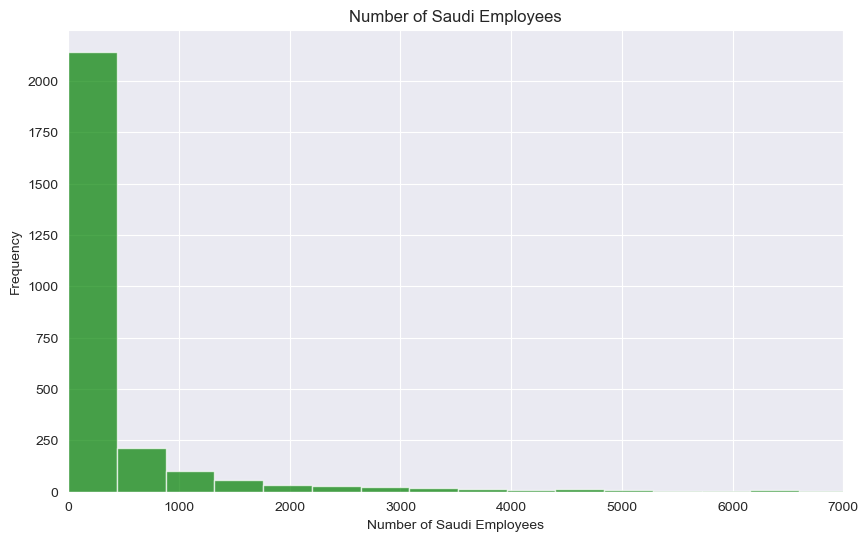

In [8]:
# Create a histogram for number_of_saudi_employees
plt.figure(figsize=(10, 6))
plt.hist(df_2022_q4['number_of_saudi_employees'], bins=150, color='green', alpha=0.7)
plt.xlabel('Number of Saudi Employees')
plt.ylabel('Frequency')
plt.title('Number of Saudi Employees')

# Set the x-axis range
plt.xlim(0, 7000)

# Show the plot
plt.show()

## Bivariate Exploration

### Q3: What is the Total Number of Enterprises Employees in Saudi Arabia Based on the Gender & Nationality for the Year 2022?

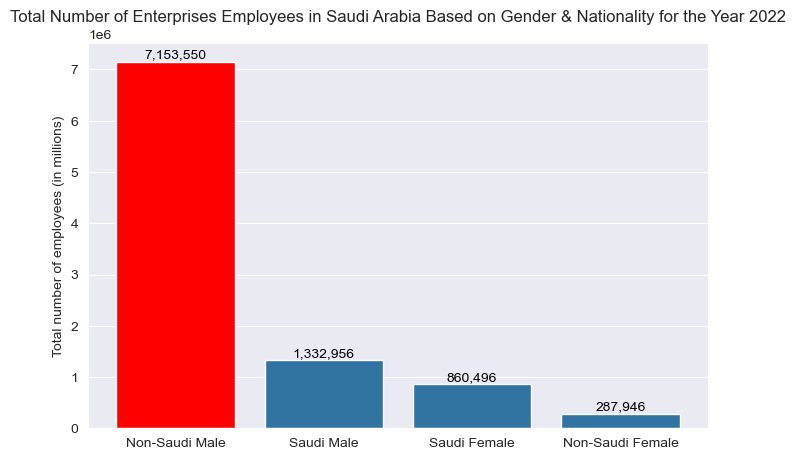

In [9]:
categories = ['Saudi Male', 'Non-Saudi Male', 'Saudi Female', 'Non-Saudi Female']
employee_counts = [saudi_male, non_saudi_male, saudi_female, non_saudi_female]

# Sort employee counts in descending order
sorted_indices = sorted(range(len(employee_counts)), key=lambda k: employee_counts[k], reverse=True)
categories = [categories[i] for i in sorted_indices]
employee_counts = [employee_counts[i] for i in sorted_indices]

# Seaborn diagram to show total number of male/female employees
plt.figure(figsize=[8, 5])
plt.title('Total Number of Enterprises Employees in Saudi Arabia Based on Gender & Nationality for the Year 2022')
sns.barplot(x=categories, y=employee_counts, color=sns.color_palette()[0])

# Set the y-label to "Total number of employees (in millions)"
plt.ylabel('Total number of employees (in millions)')

# Add annotations
for i in range(len(employee_counts)):
    plt.text(i, employee_counts[i] + 10000, f'{employee_counts[i]:,}', ha='center', va='bottom', color='black')

# Set the color of the highest bar to red
plt.bar(categories[0], employee_counts[0], color='red')

# Show the plot
plt.show()

> ### We can see from the plot that there is a significant difference in the number of male and female employees in Saudi Arabia. There are many more male employees than female employees, regardless of nationality.

### Q4: What is the total number of employees for each region in Saudi Arabia for the year 2022?

> #### total number of employees for each region in Saudi Arabia using a bar chart

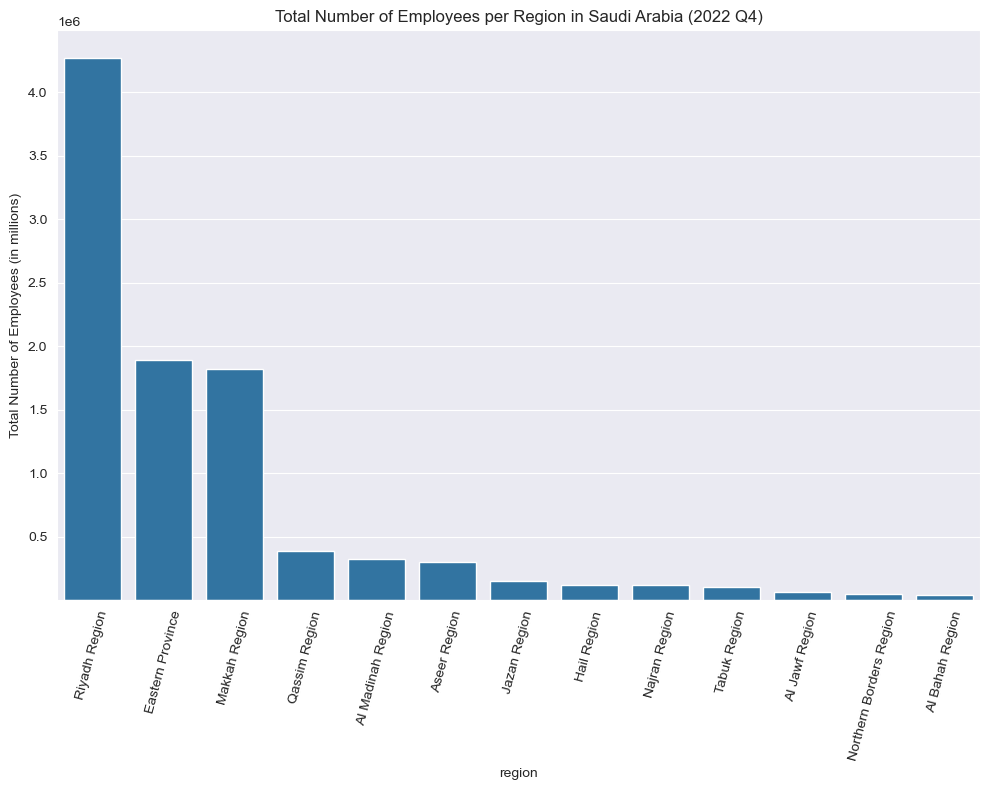

In [10]:
# get the total number of employees for each region in Saudi Arabia
total_employees_per_region = df_2022_q4.groupby('region')[[
    'number_of_saudi_employees', 'number_of_foreign_employees']].sum().sum(axis=1)

# Reset index to make 'region' a column instead of index
total_employees_per_region = total_employees_per_region.reset_index(name='total_employees')

# Sort the bars in descending order based on the total number of employees
total_employees_per_region = total_employees_per_region.sort_values(by=['total_employees'], ascending=False)

# Create a bar chart using Seaborn
plt.figure(figsize=[10, 8])
sns.barplot(data=total_employees_per_region, x='region', y='total_employees', color=sns.color_palette()[0])
plt.title('Total Number of Employees per Region in Saudi Arabia (2022 Q4)')
plt.xticks(rotation=75)
plt.ylabel('Total Number of Employees (in millions)')
plt.ylim(1000, None)
plt.tight_layout()

# Show the plot
plt.tight_layout()
plt.show()

> #### total number of employees for each region in Saudi Arabia using a heatmap

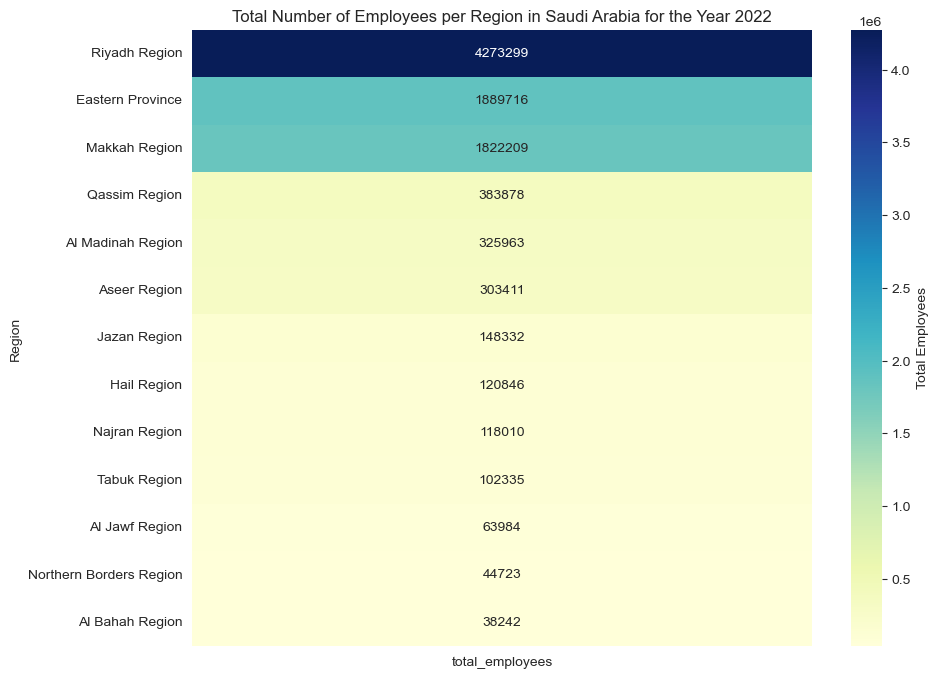

In [11]:
# Group the data and calculate total employees per region
total_employees_per_region = df_2022_q4.groupby('region')[[
    'number_of_saudi_employees', 'number_of_foreign_employees']].sum().sum(axis=1)

# Reset index to make 'region' a column instead of index
total_employees_per_region = total_employees_per_region.reset_index(name='total_employees')

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
pivot_table = total_employees_per_region.pivot_table(index='region', values='total_employees').sort_values(
    by='total_employees', ascending=False)
sns.heatmap(data=pivot_table, annot=True, fmt='.0f', cmap="YlGnBu", cbar_kws={'label': 'Total Employees'})
plt.title('Total Number of Employees per Region in Saudi Arabia for the Year 2022')
plt.ylabel('Region')

# Display the plot
plt.show()

> ### We can see that the highest number of employees is in the Riyadh region, followed by the Eastern region, and then the Makkah region, while the lowest number of employees is in Al Bahah region.

### Q5: Is there a correlation between the number of employees and the number of enterprises in Saudi Arabia?

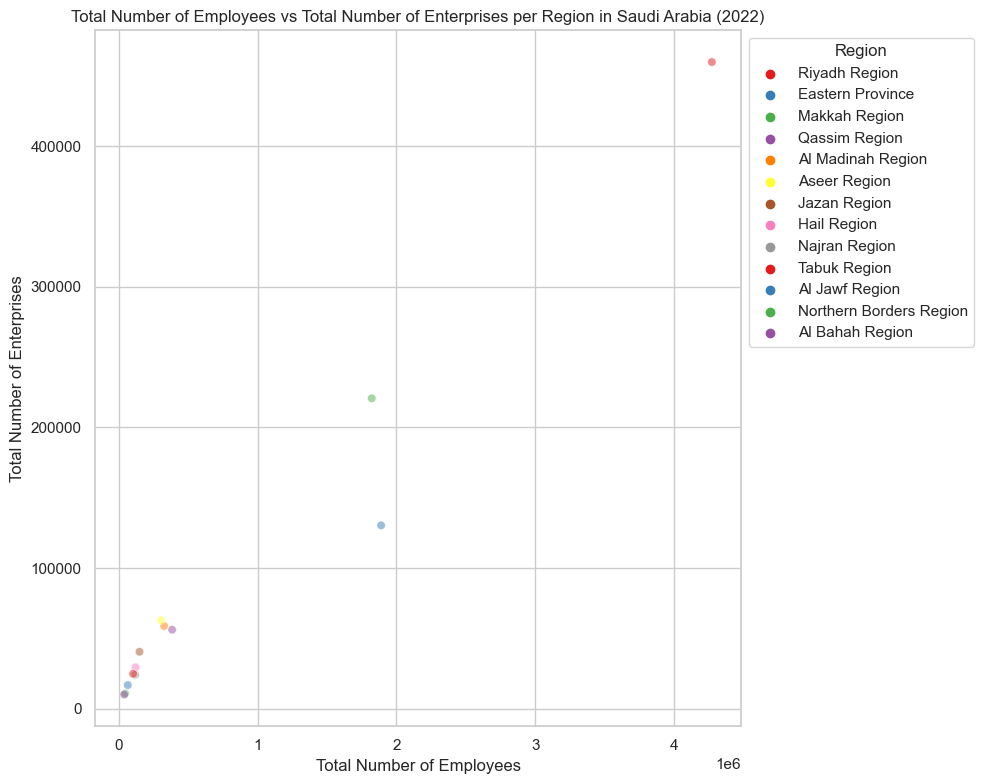

In [12]:
# Group the data and calculate total employees per region
total_employees_per_region = df_2022_q4.groupby('region')[[
    'number_of_saudi_employees', 'number_of_foreign_employees']].sum().sum(axis=1)

# Group the data and calculate total enterprises per region
total_enterprises_per_region = df_2022_q4.groupby('region')['number_of_enterprises'].sum()

# Reset index to make 'region' a column instead of index
total_employees_per_region = total_employees_per_region.reset_index(name='total_employees')
total_enterprises_per_region = total_enterprises_per_region.reset_index(name='total_enterprises')

# sort the data by total employees in descending order
total_employees_per_region = total_employees_per_region.sort_values(by='total_employees', ascending=False)

# Merge the two dataframes
total_employees_per_region = total_employees_per_region.merge(total_enterprises_per_region, on='region')

# Set up the plot style
sns.set(style='whitegrid')

# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 8))
scatter_plot = sns.scatterplot(data=total_employees_per_region, x='total_employees', y='total_enterprises',
                               hue='region', palette='Set1', alpha=0.5, cmap='nipy_spectral')
plt.title('Total Number of Employees vs Total Number of Enterprises per Region in Saudi Arabia (2022)')
plt.xlabel('Total Number of Employees')
plt.ylabel('Total Number of Enterprises')
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

# Display the plot
plt.show()

> ### We can see that the number of employees and the number of enterprises are positively correlated. This makes sense because the more enterprises there are, the more employees there will be. However, the number of employees is not directly proportional to the number of enterprises. This is because some enterprises are larger than others and therefore have more employees. Makkah region has double the number of enterprises than the Eastern region, but the Eastern region has more employees than Makkah region. This is because the enterprises in the Eastern region are larger than the enterprises in Makkah region.

### Q6: What is the distribution of total employees based on enterprise size for the year 2022?

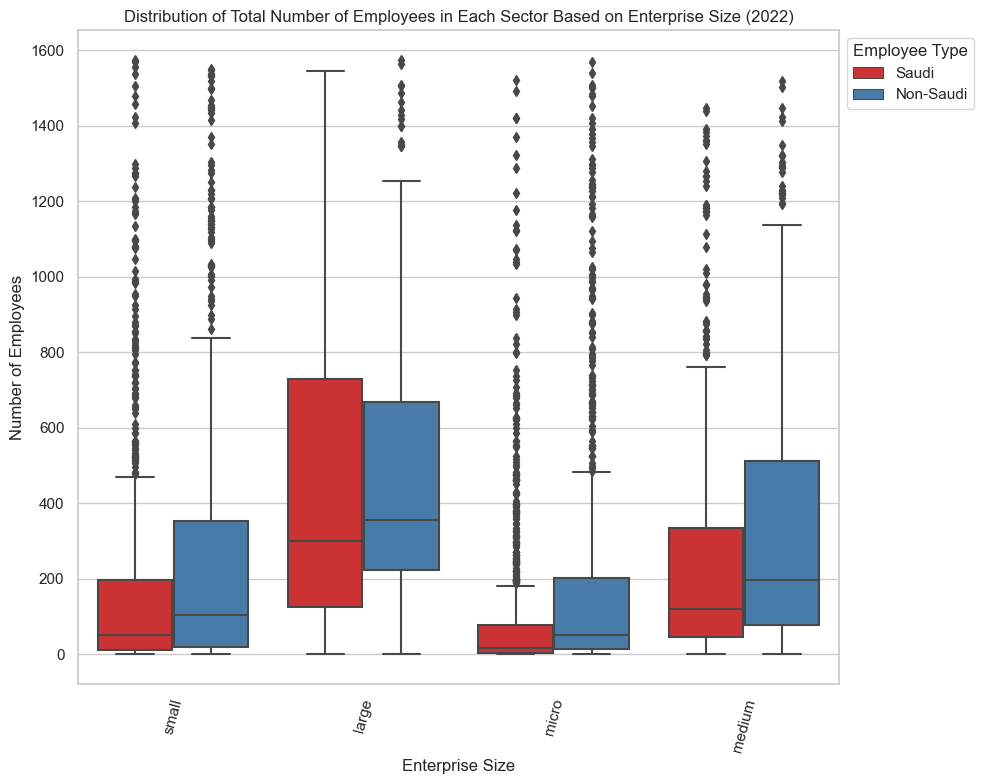

In [13]:
# Make a box plot using Seaborn for this question

# The x-axis will be the enterprise size, and the y-axis will be the number of employees for all enterprises based on the enterprise size
# Set up the plot style
sns.set(style='whitegrid')

# Create a box plot using Seaborn
plt.figure(figsize=(10, 8))

# Combine Saudi and non-Saudi employees data
combined_data = pd.concat([df_2022_q4['number_of_saudi_employees'], df_2022_q4['number_of_foreign_employees']], axis=0)
enterprise_sizes = df_2022_q4['enterprise_size'].tolist() * 2
employee_types = ['Saudi'] * len(df_2022_q4) + ['Non-Saudi'] * len(df_2022_q4)
combined_df = pd.DataFrame(
    {'enterprise_size': enterprise_sizes, 'employee_type': employee_types, 'number_of_employees': combined_data})

# Remove outliers
# Calculate the first and third quartiles
q1 = combined_df['number_of_employees'].quantile(0.25)
q3 = combined_df['number_of_employees'].quantile(0.75)

# Calculate the interquartile range
iqr = q3 - q1

# Calculate the upper and lower bounds
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# Remove outliers
combined_df = combined_df[
    (combined_df['number_of_employees'] > lower_bound) & (combined_df['number_of_employees'] < upper_bound)]

box_plot = sns.boxplot(data=combined_df, x='enterprise_size', y='number_of_employees', hue='employee_type',
                       palette='Set1')
plt.title('Distribution of Total Number of Employees in Each Sector Based on Enterprise Size (2022)')
plt.xlabel('Enterprise Size')
plt.ylabel('Number of Employees')
plt.xticks(rotation=75)
plt.legend(title='Employee Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

# Display the plot
plt.show()

> ### We can see that the number of employees is higher in larger enterprises. This makes sense because larger enterprises have more employees than smaller enterprises. However, We can Observe that the number of Saudi employees is higher than the number of non-Saudi employees in the large enterprise sizes. This is because the Saudi government is trying to increase the number of Saudi employees in the private sector. Therefore, the number of Saudi employees is higher than the number of non-Saudi employees in the large enterprise sizes.

## Multivariate Exploration

## Q7: what are the 5 most sector that have the highest number of male employees, and what are the 5 most sectors that have the highest number of female employees?

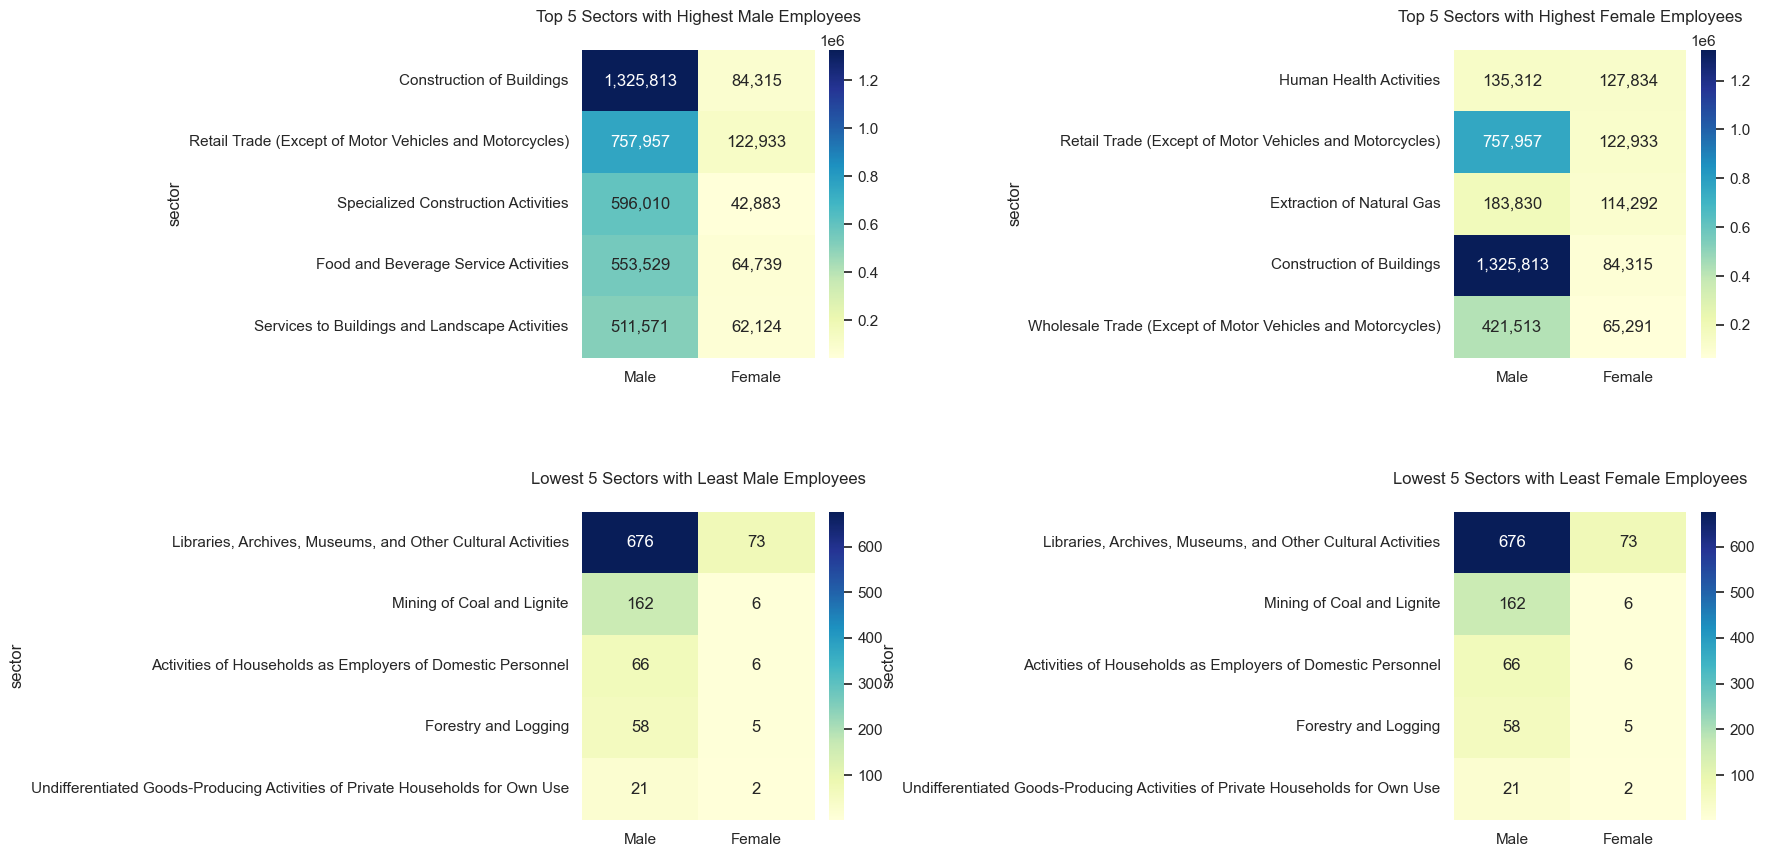

In [14]:
# Group the data by sector and calculate the sum of male and female employees
highest_sectors_of_employees = df_2022_q4.groupby('sector').agg({
    'number_of_saudi_employees (male)': 'sum',
    'number_of_foreign_employees (male)': 'sum',
    'number_of_saudi_employees (female)': 'sum',
    'number_of_foreign_employees (female)': 'sum'
})

# Calculate the total male employees by summing Saudi and foreign employees
highest_sectors_of_employees['total_male_employees'] = (
        highest_sectors_of_employees['number_of_saudi_employees (male)'] +
        highest_sectors_of_employees['number_of_foreign_employees (male)']
)

# Calculate the total female employees by summing Saudi and foreign employees
highest_sectors_of_employees['total_female_employees'] = (
        highest_sectors_of_employees['number_of_saudi_employees (female)'] +
        highest_sectors_of_employees['number_of_foreign_employees (female)']
)

# Get the 5 most sectors with the highest number of male employees
highest_sectors_of_male = highest_sectors_of_employees.sort_values(by='total_male_employees', ascending=False).head(5)
# Get the 5 least sectors with the lowest number of male employees
lowest_sectors_of_male = highest_sectors_of_employees.sort_values(by='total_male_employees', ascending=False).tail(5)

# Get the 5 most sectors with the highest number of female employees
highest_sectors_of_female = highest_sectors_of_employees.sort_values(by='total_female_employees', ascending=False).head(
    5)
# Get the 5 least sectors with the lowest number of female employees
lowest_sectors_of_female = highest_sectors_of_employees.sort_values(by='total_female_employees', ascending=False).tail(
    5)

# Set up the plot style
sns.set(style='whitegrid')

# Create a matrix of 2x2 heatmaps for the top and lowest 5 sectors with male and female employees
fig, axes = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw={'wspace': 2, 'hspace': 0.5})

# Heatmap for Top 5 Sectors with Highest Male Employees
sns.heatmap(data=highest_sectors_of_male[['total_male_employees', 'total_female_employees']],
            annot=True, fmt=",.0f", xticklabels=['Male', 'Female'],
            yticklabels=highest_sectors_of_male.index, cmap="YlGnBu", ax=axes[0, 0])
axes[0, 0].set_title('Top 5 Sectors with Highest Male Employees', pad=20)

# Heatmap for Top 5 Sectors with Highest Female Employees
sns.heatmap(data=highest_sectors_of_female[['total_male_employees', 'total_female_employees']],
            annot=True, fmt=",.0f", xticklabels=['Male', 'Female'],
            yticklabels=highest_sectors_of_female.index, cmap="YlGnBu", ax=axes[0, 1])
axes[0, 1].set_title('Top 5 Sectors with Highest Female Employees', pad=20)

# Heatmap for Lowest 5 Sectors with Lowest Male Employees
sns.heatmap(data=lowest_sectors_of_male[['total_male_employees', 'total_female_employees']],
            annot=True, fmt=",.0f", xticklabels=['Male', 'Female'],
            yticklabels=lowest_sectors_of_male.index, cmap="YlGnBu", ax=axes[1, 0])
axes[1, 0].set_title('Lowest 5 Sectors with Least Male Employees', pad=20)

# Heatmap for Lowest 5 Sectors with Lowest Female Employees
sns.heatmap(data=lowest_sectors_of_female[['total_male_employees', 'total_female_employees']],
            annot=True, fmt=",.0f", xticklabels=['Male', 'Female'],
            yticklabels=lowest_sectors_of_female.index, cmap="YlGnBu", ax=axes[1, 1])
axes[1, 1].set_title('Lowest 5 Sectors with Least Female Employees', pad=20)

# Adjust layout
plt.tight_layout()

# Display the matrix of heatmaps
plt.show()

> ### We can see that the construction and the retail trade sectors have the highest number of male employees. The human health and the retail trade sectors have the highest number of female employees. The retail trade sector is the second-highest sector for both male and female employees. Also, we can see from the second row in the heatmap matrix that the male and female employees share the exact same sectors for the lowest number of employees.

### Let's group the most sectors that have the highest number of male employees and the highest number of female employees and observe the number of employees based on the gender in each of these sector.

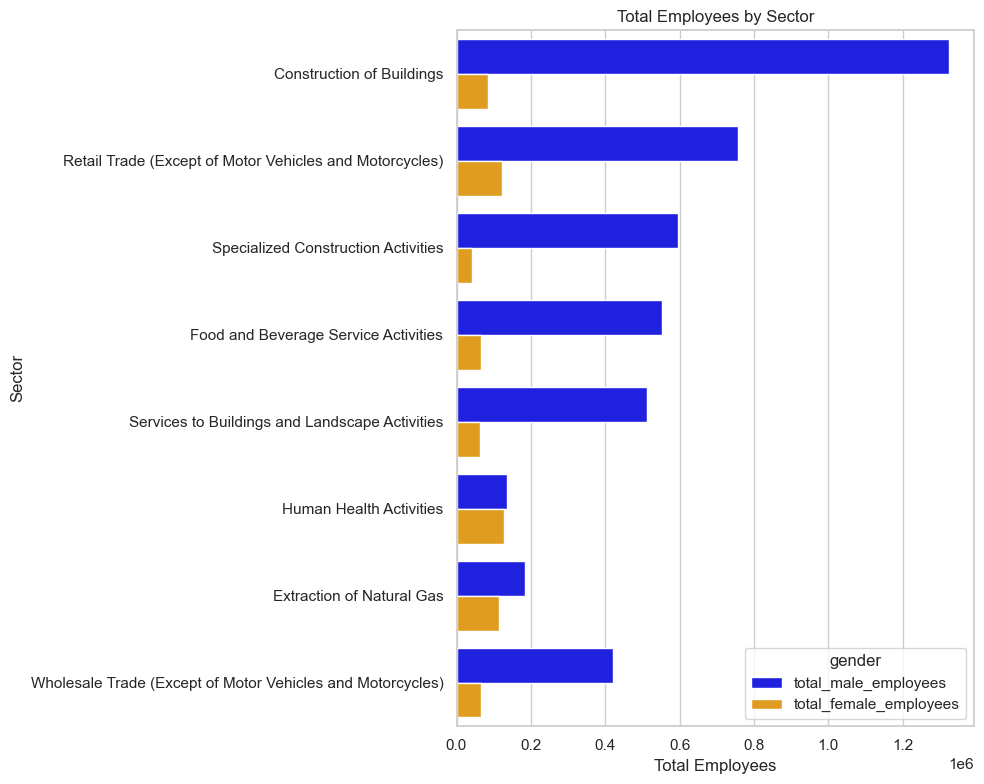

In [15]:
# Group the data by sector and calculate the sum of male and female employees
highest_sectors_of_employees = df_2022_q4.groupby('sector').agg({
    'number_of_saudi_employees (male)': 'sum',
    'number_of_foreign_employees (male)': 'sum',
    'number_of_saudi_employees (female)': 'sum',
    'number_of_foreign_employees (female)': 'sum'
})

# Calculate the total male employees by summing Saudi and foreign employees
highest_sectors_of_employees['total_male_employees'] = (
        highest_sectors_of_employees['number_of_saudi_employees (male)'] +
        highest_sectors_of_employees['number_of_foreign_employees (male)']
)

# Calculate the total female employees by summing Saudi and foreign employees
highest_sectors_of_employees['total_female_employees'] = (
        highest_sectors_of_employees['number_of_saudi_employees (female)'] +
        highest_sectors_of_employees['number_of_foreign_employees (female)']
)

# Get the 5 most sectors with the highest number of male employees
highest_sectors_of_male = highest_sectors_of_employees.sort_values(by='total_male_employees', ascending=False).head(5)

# Get the 5 most sectors with the highest number of female employees
highest_sectors_of_female = highest_sectors_of_employees.sort_values(by='total_female_employees', ascending=False).head(
    5)

# Combine male and female data into one DataFrame
combined_data = pd.concat([highest_sectors_of_male[['total_male_employees', 'total_female_employees']],
                           highest_sectors_of_female[['total_male_employees', 'total_female_employees']]])

# Reset the index to have 'sector' as a column
combined_data = combined_data.reset_index()

# Melt the DataFrame to a long format
combined_data_melted = pd.melt(combined_data, id_vars='sector', var_name='gender', value_name='total_employees')

# Set up the plot style
sns.set(style='whitegrid')

# Create a multivariate clustered bar plot using Seaborn with horizontal bars
plt.figure(figsize=(10, 8))
sns.barplot(data=combined_data_melted, y='sector', x='total_employees', hue='gender', palette=['blue', 'orange'])
plt.title('Total Employees by Sector')
plt.ylabel('Sector')
plt.xlabel('Total Employees')
plt.tight_layout()

# Display the plot
plt.show()

## Q8: What is the total number of employees based on nationality for each region in Saudi Arabia for the year 2022?

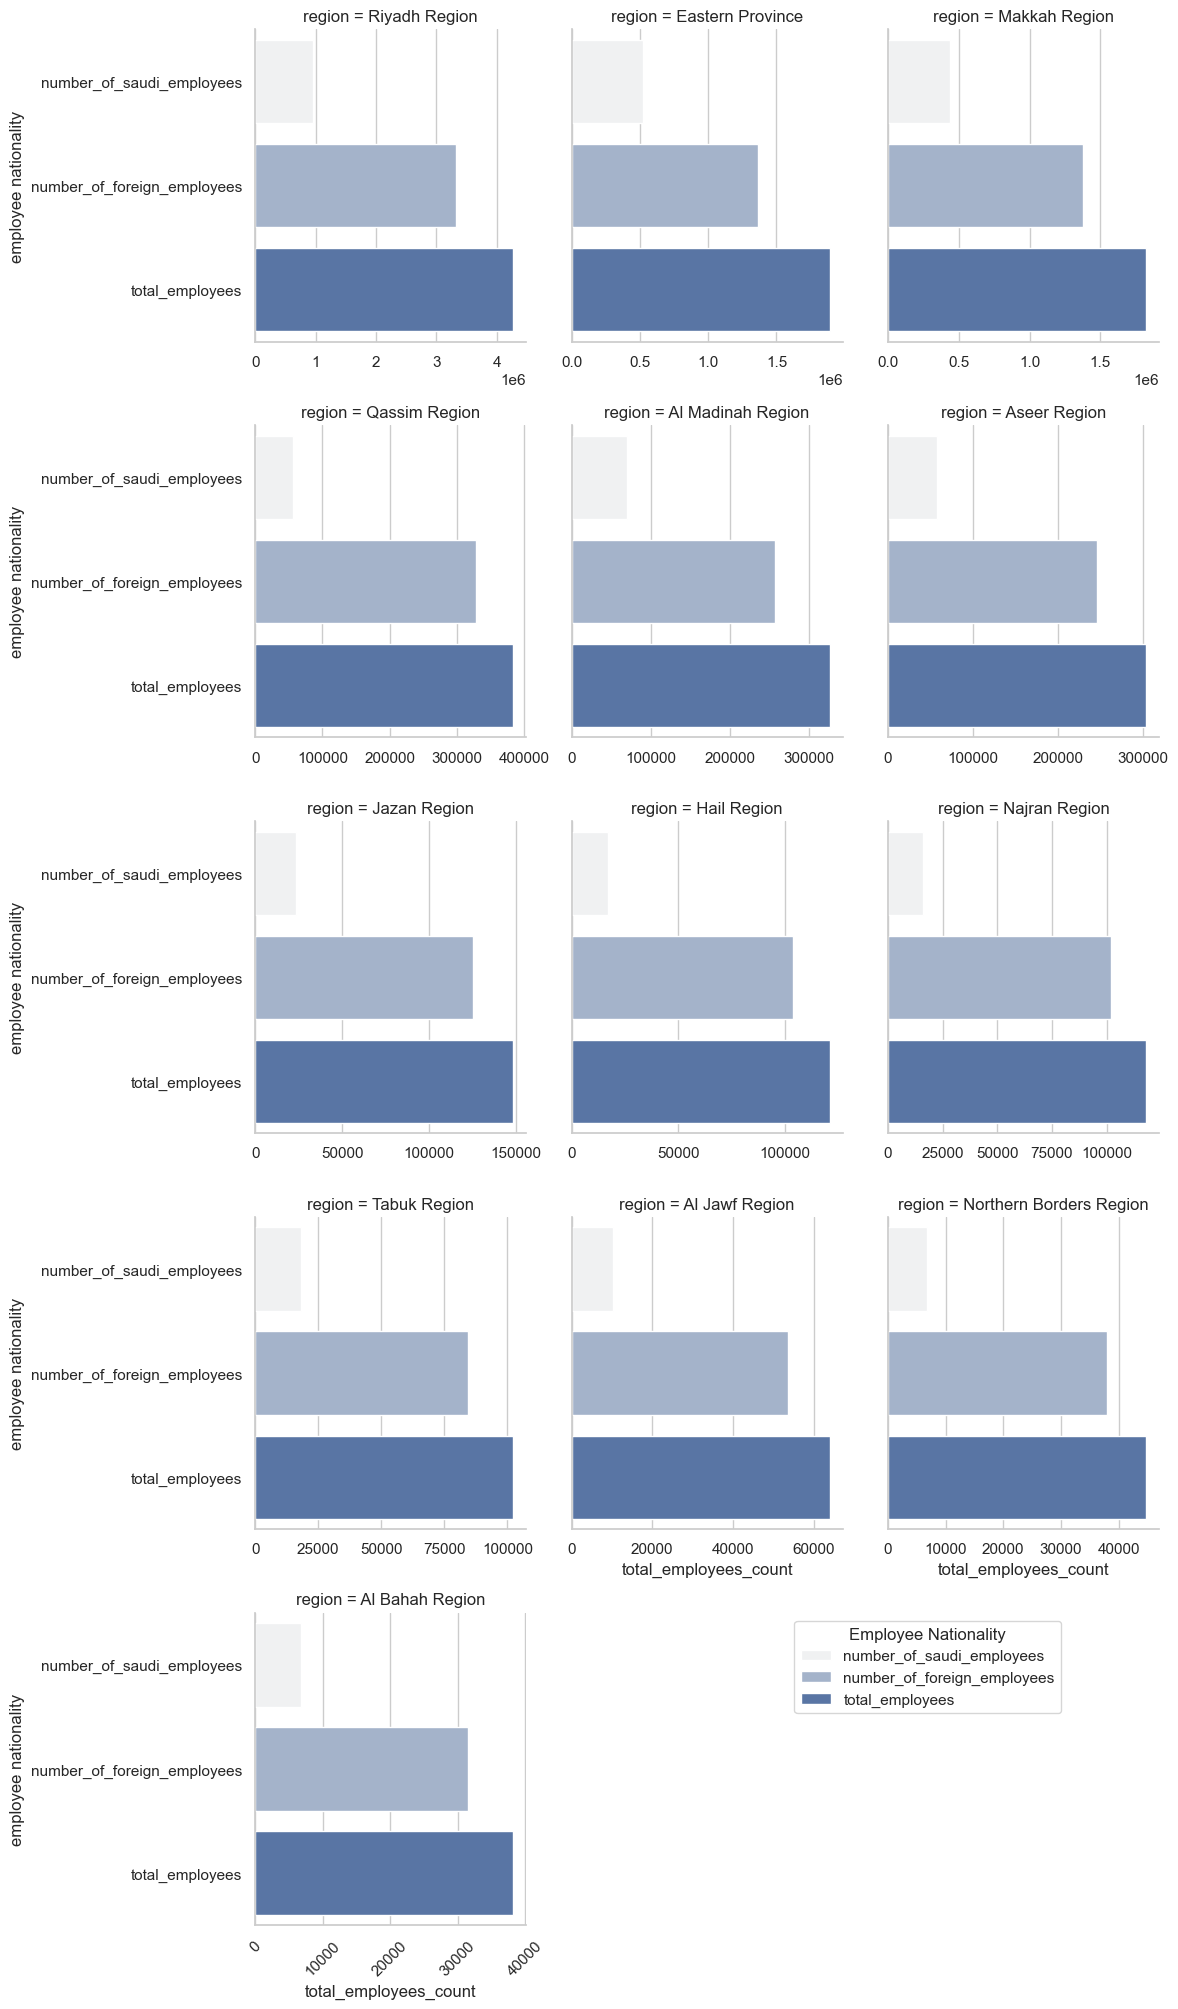

In [16]:
# Facet plot for total employees by region and employee nationality
# Group the data and calculate total employees per region
total_employees_per_region = df_2022_q4.groupby('region')[[
    'number_of_saudi_employees', 'number_of_foreign_employees']].sum()

# Reset index to make 'region' a column instead of index
total_employees_per_region = total_employees_per_region.reset_index()

# Calculate total employees by region and employee type
total_employees_per_region['total_employees'] = total_employees_per_region[
    ['number_of_saudi_employees', 'number_of_foreign_employees']].sum(axis=1)

# Sort the data by total employees in descending order
total_employees_per_region = total_employees_per_region.sort_values(by='total_employees', ascending=False)

# Melt the data to make it suitable for a bar chart
melted_data = total_employees_per_region.melt(id_vars='region', var_name='employee nationality',
                                              value_name='total_employees_count')

# Create a facet plot using Seaborn
sns.set(style='whitegrid')

facet_plot = sns.FacetGrid(
    data=melted_data,
    col='region',
    col_wrap=3,
    height=4,
    sharex=False  # Ensure each subplot has its own x-axis
)

facet_plot.map_dataframe(sns.barplot,
                         x='total_employees_count',
                         y='employee nationality',  # Use 'employee_type' instead of 'region'
                         hue='employee nationality',
                         # Use 'employee_type' for hue to distinguish Saudi and foreign employees
                         dodge=False,  # Stacked bars
                         ci=None  # Disable confidence intervals for simplicity
                         )

# Add legend
plt.legend(title='Employee Nationality', loc='upper right', bbox_to_anchor=(3, 1))

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

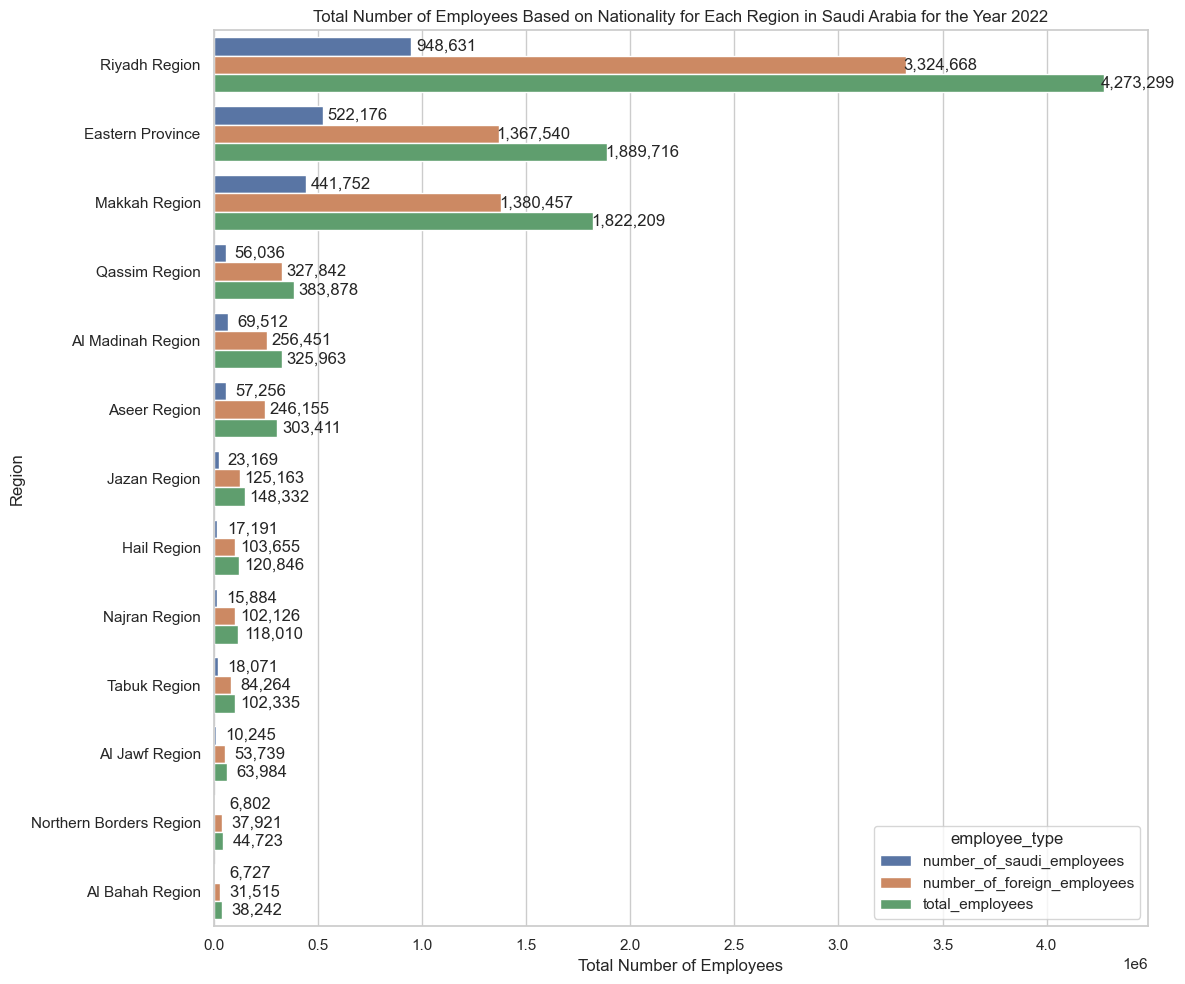

In [17]:
# another way to do it
# Group the data and calculate total employees per region
total_employees_per_region = df_2022_q4.groupby('region')[[
    'number_of_saudi_employees', 'number_of_foreign_employees']].sum()

# Reset index to make 'region' a column instead of index
total_employees_per_region = total_employees_per_region.reset_index()

# Calculate total employees by region and employee type
total_employees_per_region['total_employees'] = total_employees_per_region[
    ['number_of_saudi_employees', 'number_of_foreign_employees']].sum(axis=1)

# Sort the data by total employees in descending order
total_employees_per_region = total_employees_per_region.sort_values(by='total_employees', ascending=False)

# Melt the data to make it suitable for a bar chart
melted_data = total_employees_per_region.melt(id_vars='region', var_name='employee_type', value_name='total_employees_count')

# Create a bar chart using Seaborn
plt.figure(figsize=[12, 10])
bar_plot = sns.barplot(data=melted_data, x='total_employees_count', y='region', hue='employee_type', orient='h')
plt.title('Total Number of Employees Based on Nationality for Each Region in Saudi Arabia for the Year 2022')
plt.xlabel('Total Number of Employees')
plt.ylabel('Region')
plt.tight_layout()

# Add counts above the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_width(), ',.0f'),
                      (p.get_width(), p.get_y() + p.get_height() / 2),
                      ha='center', va='center',
                      xytext=(25, 0),
                      textcoords='offset points')

plt.tight_layout()

# Display the plot
plt.show()

> ### We can see that the number of foreign employees is higher than the number of Saudi employees in all regions.

## Conclusions
> Summary of the findings of the analysis:
> - The total number of enterprises employees in Saudi Arabia for the year 2022 is 9,634,948 employees, 88.1% of them are male employees and 11.9% are female employees.
> - The total count of each distribution for the enterprises sizes as follows:
>   - 1031 micro enterprises.
>   - 870 small enterprises.
>   - 559 medium enterprises.
>   - 301 large enterprises.
> - The Total Number of Enterprises Employees in Saudi Arabia Based on the Gender & Nationality for the Year 2022 as follows:
>   - 7,153,550 Non-Saudi Male Employees.
>   - 1,332,956 Saudi Male Employees.
>   - 860,496 Saudi Female Employees.
>   - 287,946 Non-Saudi Female Employees.
> - The number of foreign male employees is higher than the number of Saudi male employees. However, the number of Saudi female is higher than the number of foreign female employees.
> - Riyadh region has the highest number of employees with above 4,000,000, followed by the Eastern region, and then the Makkah region, while the lowest number of employees is in Al Bahah region.
> - Makkah region has double the number of enterprises than the Eastern region, but the Eastern region has more employees than Makkah region. This is because the enterprises in the Eastern region are larger than the enterprises in Makkah region.
> - For large enterprises, the number of Saudi employees is higher than the number of foreign employees.
> - The construction and the retail trade sectors have the highest number of male employees.
> - The human health and the retail trade sectors have the highest number of female employees.
> - The retail trade sector is the second-highest sector for both male and female employees